In [48]:
import pandas as pd
import os
from tqdm import tqdm
import json
from plotnine import *

In [4]:
ancient_contigs = {}

In [52]:
def get_ancient_contigs(pydamage_result_file, min_damage, alpha):
    """Filter contigs from pydamage results
    Args:
        pydamage_result_file(str): Path to pydamage result file
        min_damage(float): Minimum amount of damage
        alpha(float): qvalue threshold
    Returns:
        list: list of contigs meeting filtering requirements
    """
    csv = pd.read_csv(pydamage_result_file, index_col=0)
    the_mean = csv['damage_model_pmax'].mean()
    the_std = csv['damage_model_pmax'].std()
    the_min = the_mean - 2*the_std
    the_max = the_mean + 2*the_std
    return(list(csv.query(f"damage_model_pmax >= {min_damage} and damage_model_pmax >= {the_min} and damage_model_pmax <= {the_max} and qvalue < {alpha}").index))

In [53]:
resdir = "./results/"

In [54]:
for r in tqdm(os.listdir(resdir)):
    samp_name = r.replace(".pydamage_results.csv","")
    ancient_contigs[samp_name] = get_ancient_contigs(f"{resdir}/{r}", min_damage=0.05, alpha=0.05)

100%|██████████| 522/522 [00:25<00:00, 20.87it/s]


In [55]:
with open("ancient_contigs.json", "w") as wjs:
    json.dump(ancient_contigs, wjs)

How to read and write JSON data in Python: [https://realpython.com/python-json/](https://realpython.com/python-json/)

In [56]:
nb_contig_bin = {}
for i in ancient_contigs:
    nb_contig_bin[i] = len(ancient_contigs[i])

In [57]:
nb_contig_bin = pd.Series(nb_contig_bin, name="nb_contigs_per_bin").to_frame()

In [60]:
nb_contig_bin['nb_contigs_per_bin'].value_counts().sort_index()

0      36
1       5
2       4
3      13
4       8
       ..
420     1
461     1
508     1
527     1
823     1
Name: nb_contigs_per_bin, Length: 176, dtype: int64

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


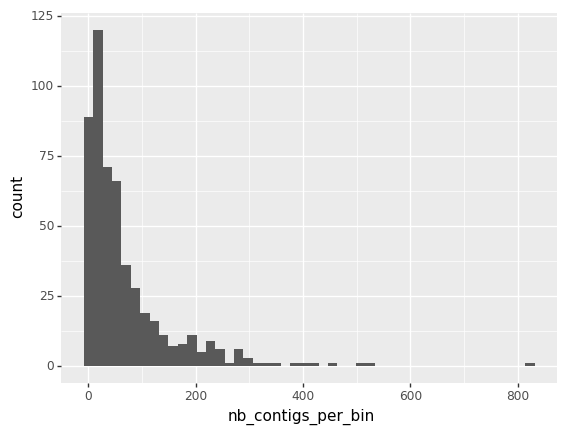

<ggplot: (-9223363303260940330)>

In [59]:
ggplot(nb_contig_bin, aes('nb_contigs_per_bin')) + geom_histogram()